# Modelo Polinomial


En estadística, la regresión polinomial es una forma de regresión lineal en la que la relación entre la variable independiente x y la variable dependiente y es modelada como un polinomio de grado n en x.

In [8]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

df = pd.read_csv(url).fillna(0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,0.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,ZWE,Africa,Zimbabwe,2020-11-29,9822.0,0.0,86.000,275.0,0.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60476,ZWE,Africa,Zimbabwe,2020-11-30,9950.0,128.0,91.714,276.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60477,ZWE,Africa,Zimbabwe,2020-12-01,10129.0,179.0,104.429,277.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
60478,ZWE,Africa,Zimbabwe,2020-12-02,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [13]:
df= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
df=df[['date','total_cases','total_deaths','location']]
x=np.arange(1,len(df)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1])
y1=np.array(df.values[:,2])
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df= df[df["date"] > 0]
df

,date,total_cases,total_deaths,location
15839,60,6.0,0.0,Ecuador
15840,61,6.0,0.0,Ecuador
15841,62,7.0,0.0,Ecuador
15842,63,10.0,0.0,Ecuador
15843,64,13.0,0.0,Ecuador
...,...,...,...,...
16112,333,192117.0,13423.0,Ecuador
16113,334,192685.0,13461.0,Ecuador
16114,335,193673.0,13501.0,Ecuador
16115,336,194876.0,13562.0,Ecuador


           4            3         2
7.775e-06 x - 0.008082 x + 3.505 x + 203.8 x - 3833


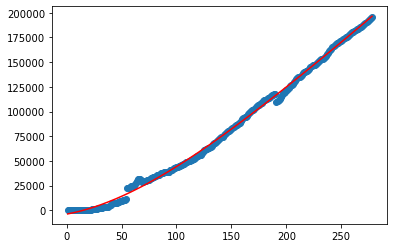

In [21]:
x=np.arange(1,len(df)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1], dtype='float')
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y)  
plt.plot(x, fun1(x), c='r')  
plt.show()

           4            3         2
7.775e-06 x - 0.008082 x + 3.505 x + 203.8 x - 3833


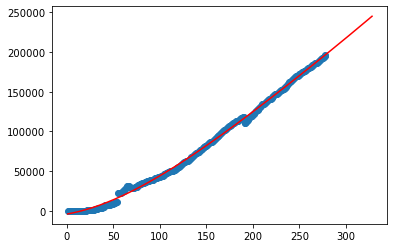

In [22]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y) 
x1=np.arange(1,len(df)+51,1, dtype='float')
plt.plot(x1, fun1(x1), c='r')  
plt.show()

# Referecias :
https://conzmr.wordpress.com/2017/04/04/regresion-polinomial/#:~:text=En%20estad%C3%ADstica%2C%20la%20regresi%C3%B3n%20polinomial,de%20grado%20n%20en%20x.&text=Se%20ajusta%20a%20los%20datos,x%20y%20potencias%20de%20x.
https://aprendeia.com/algoritmo-regresion-polinomial-machine-learning-practica-con-python/
